<a href="https://colab.research.google.com/github/RodrigoRoman/machine_learning_abc/blob/main/morphological_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [13]:
import cv2
import urllib
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt


In [14]:
url = "https://images.unsplash.com/photo-1674694773916-e2cf36908024?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwyM3x8fGVufDB8fHx8&auto=format&fit=crop&w=800&q=60"
urllib.request.urlretrieve(url, "image.jpg")
img = img2 = cv2.imread("image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("image.jpg",0)

(1000, 800, 3) (1000, 800, 3) (1000, 800)


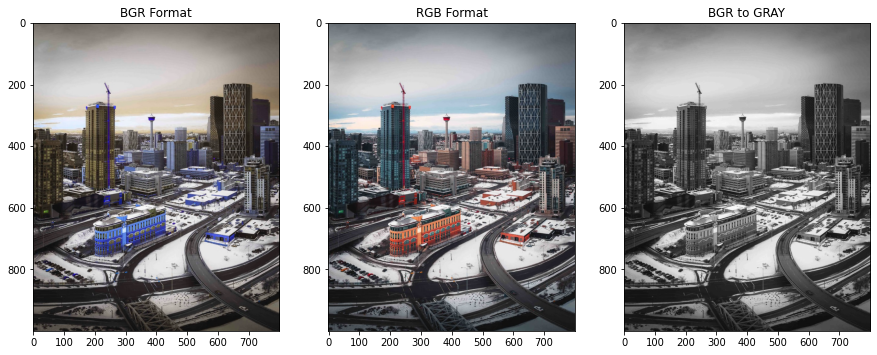

In [15]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

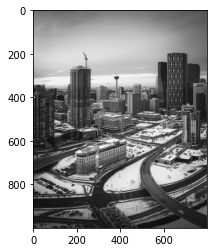

In [16]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

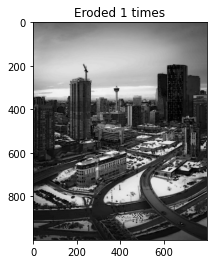

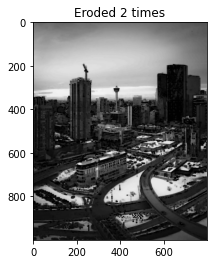

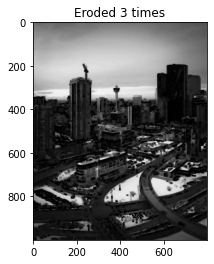

In [17]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

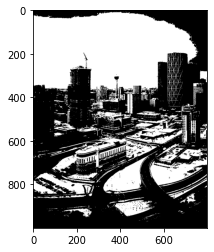

In [18]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

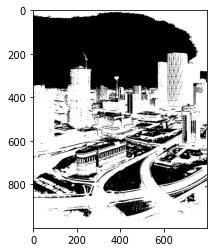

In [19]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [20]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


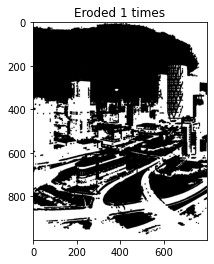

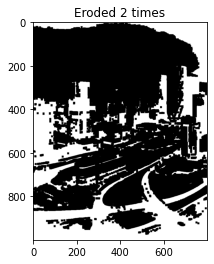

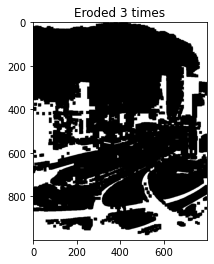

In [21]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

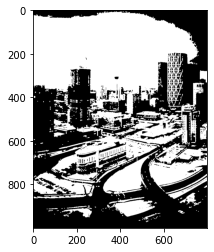

In [22]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)
 
plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


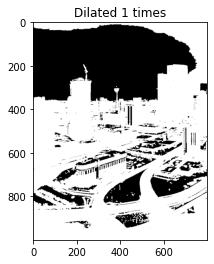

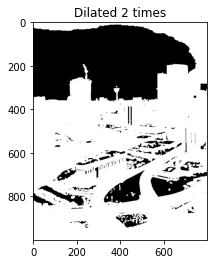

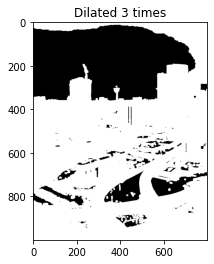

In [23]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

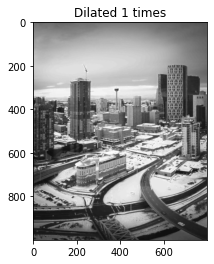

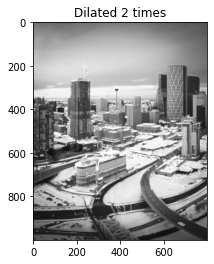

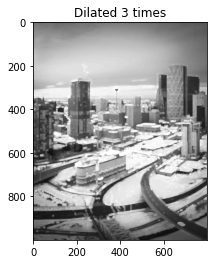

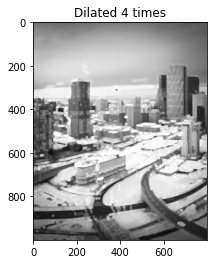

In [24]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

<h2>b) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab
</h2>

(10, 7)


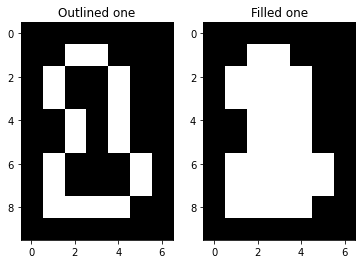

[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0]]


In [59]:
#Implementacion de dilatacion para llenar orificios

# Definimos la funcion que regresa el objeto sin orificios
def fillHoles(img,start_x,start_y):

  # Calculamos el complemento de la imagen para usarlo como condicional
  complement_image = 1-img

  # Creamos un array para guardar la imagen resultante sin orificios
  filledImage = np.zeros(img.shape)

  # Convertimos el elemento en el que empezamos en 1
  filledImage[start_x,start_y] = 1
  print(filledImage.shape)

  # Definimos nuestro SE
  SE = np.array([[0,1,0],
                 [1,0,1],
                 [0,1,0]
                 ])
  
  # Asumimos que la imagen ingresa a la funcion con un padding de 1
  padd = 1
  current_filled = filledImage.copy()
  while True:
    for y in range(img.shape[0]-2):
        for x in range(img.shape[1]-2):
          windowimage = filledImage[y:y+(padd*3),x:x+(padd*3)]
          if((True in np.logical_and(windowimage,SE)) and (complement_image[y+padd,x+padd] == 1)):
            current_filled[y+padd,x+padd] = 1
    if(np.count_nonzero(current_filled == 1) == np.count_nonzero(filledImage == 1)):
      break
    else:
      filledImage = current_filled.copy()
  union = np.logical_or(filledImage,img)
  return union*1




# Tomemos el ejemplo del libro de Gonzales
outlinedOne = np.array([
    [0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0],
    [0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0],
    [0,0,1,0,1,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,0,0,1,0],
    [0,1,0,0,0,1,0],
    [0,1,1,1,1,0,0],
    [0,0,0,0,0,0,0]
])

start_x,start_y = (3,3)
filledImage = fillHoles(outlinedOne,3,3)

plt.subplot(121)
plt.imshow(outlinedOne, cmap='gray')
plt.title('Outlined one')


# Plot the second image
plt.subplot(122)
plt.imshow(filledImage, cmap='gray')
plt.title('Filled one')


plt.show()
print(filledImage)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


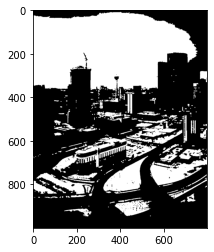

In [25]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

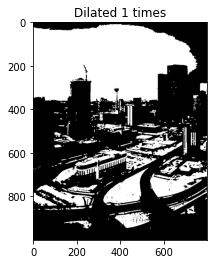

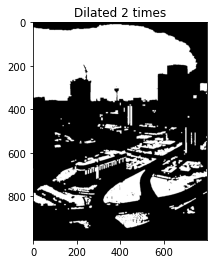

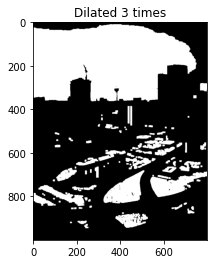

In [26]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

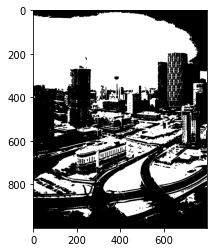

In [27]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
 
#print output
plt.imshow(closing,cmap='gray')
plt.show()

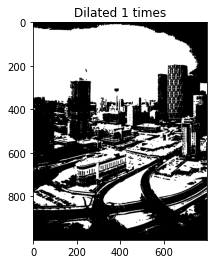

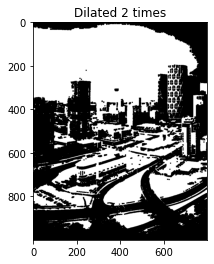

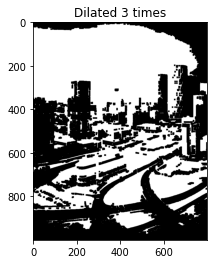

In [28]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

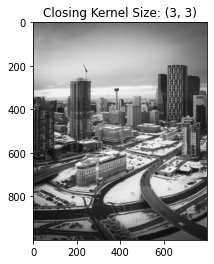

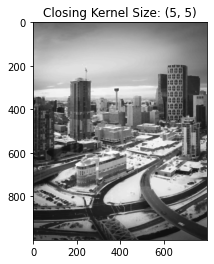

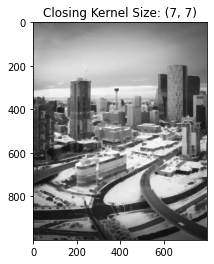

In [29]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

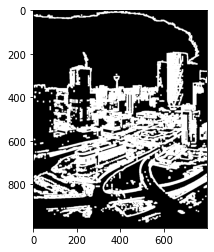

In [30]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)
 
#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

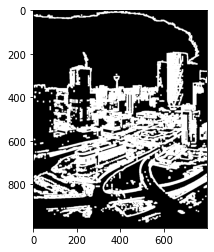

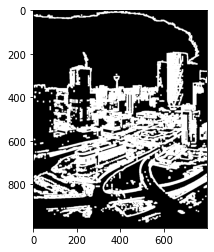

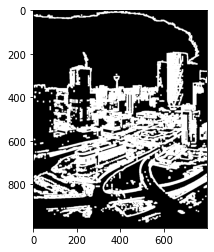

In [31]:
for i in range(0,3): 
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

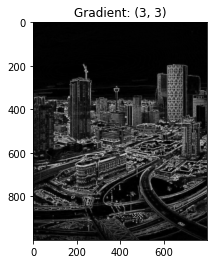

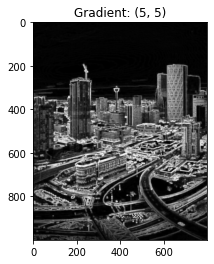

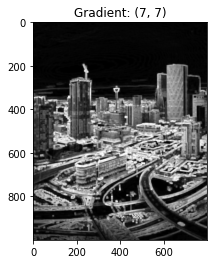

In [32]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [33]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

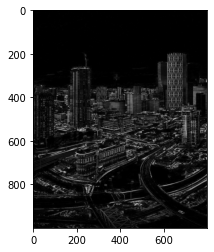

In [34]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


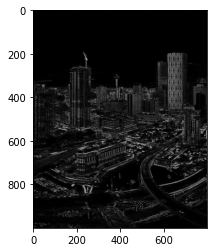

In [35]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()